In [1]:
# This is the import cell
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.ticker as ticker
from collections import OrderedDict
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)

# Here are my rc parameters for matplotlib
mpl.rc('font', serif='Helvetica Neue') 
mpl.rcParams.update({'font.size': 9})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 2000
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 0.5
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.axisbelow'] = True

In [2]:
# Get the current path
if first:
    parent = os.getcwd()
os.chdir(parent)

# Grab file names from data folder
rdfs = os.listdir('all_rdf')
try:
    rdfs.remove('.DS_Store')
except:
    print(".DS_Store not in directory")

.DS_Store not in directory


In [3]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, string):
    for i in xrange(len(fname)):
        if fname[i] == string[0]:
#             print"{} matches {}".format(fname[i], string[0])
            for j in xrange(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
#                     print"{} matches {}".format(fname[i+j], string[j])
                    if j == (len(string) - 1):
#                         print"Final match!"
                        return True
                else:
                    break
    return False
    
def txtValue(fname, string):
    out = ""
    index = 0
    for i in xrange(len(fname)):
        if fname[i] == string[0]:
            for j in xrange(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        # Last index of search string
                        index = i + j
                else:
                    break
                        
    # First index of value
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        elif fname[index] == ".":    
            if fname[index+1].isdigit():
                out = out + fname[index]
                index += 1
            else:
                mybool = False
        else:
            mybool = False
    
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3, arr4):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    cpy4 = np.copy(arr4)
    ind = np.arange(0, len(arr1))
    for i in xrange(len(cpy1)):
        for j in xrange(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] == cpy3[j] and cpy4[i] > cpy4[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in xrange(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [4]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in rdfs:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 
                
# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
    print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(rdfs, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_rdf = []
os.chdir(parent)
os.chdir('all_rdf')
for i in rdfs:
    print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_rdf.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_rdf[0])

Sorting... 
rdf_cluster_pe200_phi45_eps0.0001_align3_dtau1.0e-06.txt
rdf_cluster_pe200_phi45_eps0.001_align3_dtau1.0e-06.txt
rdf_cluster_pe200_phi45_eps0.01_align3_dtau1.0e-06.txt
rdf_cluster_pe200_phi45_eps0.1_align3_dtau1.0e-06.txt
rdf_cluster_pe200_phi45_eps1.0_align3_dtau1.0e-06.txt
rdf_cluster_pe250_phi55_eps0.0001_align3_dtau1.0e-06.txt
rdf_cluster_pe150_phi55_eps0.0001_align3_dtau1.0e-06.txt
rdf_cluster_pe200_phi55_eps0.0001_align3_dtau1.0e-06 2.txt
rdf_cluster_pe450_phi55_eps0.0001_align3_dtau1.0e-06.txt
rdf_cluster_pe300_phi55_eps0.0001_align3_dtau1.0e-06.txt
rdf_cluster_pe200_phi55_eps0.0001_align3_dtau1.0e-06.txt
rdf_cluster_pe400_phi55_eps0.0001_align3_dtau1.0e-06.txt
rdf_cluster_pe100_phi55_eps0.0001_align3_dtau1.0e-06.txt
rdf_cluster_pe350_phi55_eps0.0001_align3_dtau1.0e-06.txt
rdf_cluster_pe500_phi55_eps0.001_align3_dtau1.0e-06.txt
rdf_cluster_pe150_phi55_eps0.001_align3_dtau1.0e-06.txt
rdf_cluster_pe450_phi55_eps0.001_align3_dtau1.0e-06.txt
rdf_cluster_pe200_phi55_eps0.

,tauB,r,g(r)
0,100.0,0.102,0.000
1,100.0,0.107,0.000
2,100.0,0.112,0.000
3,100.0,0.117,0.000
4,100.0,0.121,0.000
...,...,...,...
2083,100.0,9.979,1.015
2084,100.0,9.983,0.990
2085,100.0,9.988,1.011
2086,100.0,9.993,0.995


In [5]:
# Functions to compute lattice spacing
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / r) * ((2*(div**12)) - (div)**6)
    return dU
    
def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    magnitude = np.sqrt(28.)
    return (magnitude * (pe)) / (np.pi)
    
def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out

In [6]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt', 'lat']
params = pd.DataFrame(columns=headers)
for i in range(0, len(all_rdf)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    lat = conForRClust(pe, ep)
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau, lat]], columns=headers)
    params = params.append(df, ignore_index = True)
display(params)

,pe,peA,peB,xA,eps,phi,tauPer_dt,lat
0,200,0,0,100.0,0.0001,45.0,1.0,0.423757
1,200,0,0,100.0,0.0010,45.0,1.0,0.505658
2,200,0,0,100.0,0.0100,45.0,1.0,0.602904
3,200,0,0,100.0,0.1000,45.0,1.0,0.717182
4,200,0,0,100.0,1.0000,45.0,1.0,0.847361
...,...,...,...,...,...,...,...,...
52,200,0,0,100.0,0.0001,65.0,1.0,0.423757
53,200,0,0,100.0,0.0010,65.0,1.0,0.505658
54,200,0,0,100.0,0.0100,65.0,1.0,0.602904
55,200,0,0,100.0,0.1000,65.0,1.0,0.717182


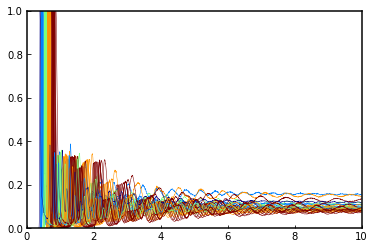

In [7]:
# Let's plot the RDFs
for i in range(0, len(all_rdf)):
    mmax = max(all_rdf[i]['g(r)'])
    if (all_rdf[i]['g(r)'].iloc[-1]/mmax) < 0.2:
        plt.plot(all_rdf[i]['r'], all_rdf[i]['g(r)']/mmax, c=plt.cm.jet((np.log10(params['eps'][i])+4.)/4.))
    
plt.xlim(0, 10.)
plt.ylim(0, 1.)
plt.show()

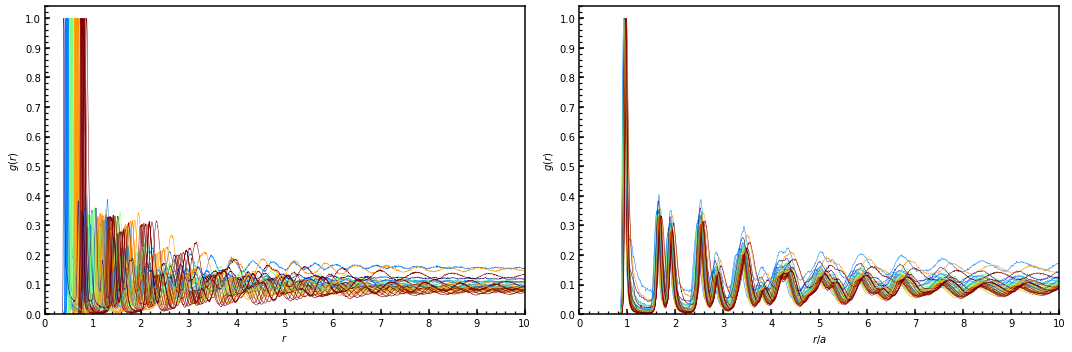

In [8]:
# Let's plot the RDFs
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for i in range(0, len(all_rdf)):
    mmax = max(all_rdf[i]['g(r)'])
    # This gets rid of non PS data
    if (all_rdf[i]['g(r)'].iloc[-1]/mmax) < 0.2:
        ax[0].plot(all_rdf[i]['r'], all_rdf[i]['g(r)']/mmax,
                   c=plt.cm.jet((np.log10(params['eps'][i])+4.)/4.))
        ax[1].plot(all_rdf[i]['r'] / params['lat'][i], all_rdf[i]['g(r)']/mmax,
                   c=plt.cm.jet((np.log10(params['eps'][i])+4.)/4.))

for i in range(0, len(ax)):
    ax[i].set_xlim(0, 10.)
    ax[i].set_ylim(0, 1.04)
    # Set the x and y minor ticks
    loc = ticker.MultipleLocator(base=1.)
    ax[i].xaxis.set_major_locator(loc)
    loc = ticker.MultipleLocator(base=0.2)
    ax[i].xaxis.set_minor_locator(loc)
    loc = ticker.MultipleLocator(base=0.1)
    ax[i].yaxis.set_major_locator(loc)
    loc = ticker.MultipleLocator(base=0.02)
    ax[i].yaxis.set_minor_locator(loc)
    # Tick width and height
    ax[i].xaxis.set_tick_params(width=1.5, size=5.)
    ax[i].yaxis.set_tick_params(width=1.5, size=5.)
    ax[i].xaxis.set_tick_params(which='minor', width=1.25, size=3.)
    ax[i].yaxis.set_tick_params(which='minor', width=1.25, size=3.)
    ax[i].set_ylabel(r'$g(r)$')
ax[0].set_xlabel(r'$r$')
ax[1].set_xlabel(r'$r/a$')
plt.tight_layout()
plt.savefig('normalized_rdf.pdf', dpi=100)
plt.show()
plt.close()



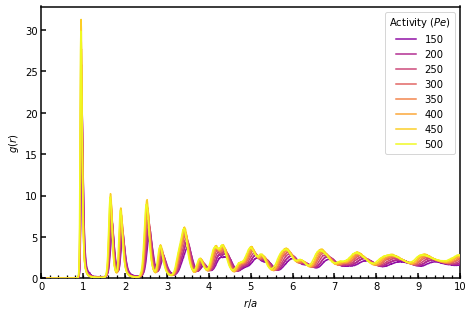

In [9]:
# Now let's look at this keeping various variables constant: epsilon
fig, ax = plt.subplots(1, 1, figsize=(7.5, 5))

for i in range(0, len(all_rdf)):
    if params['eps'][i] == 1. and params['pe'][i] > 100 and params['phi'][i] == 55:
        mmax = max(all_rdf[i]['g(r)'])
        ax.plot(all_rdf[i]['r'] / params['lat'][i], all_rdf[i]['g(r)'],
                c=plt.cm.plasma(params['pe'][i]/500.), lw=1.5,
                label=int(params['pe'][i]), zorder=params['pe'][i])

handles, labels = ax.get_legend_handles_labels()
for i in range(0, len(labels)):
    for j in range(0, len(labels)):
        if labels[j] < labels[i] and j > i:
            labels[i], labels[j] = labels[j], labels[i]
            handles[i], handles[j] = handles[j], handles[i]
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title=r'Activity $(Pe)$')
 
ax.set_xlim(0, 10.)
ax.set_ylim(0,)
# Set the x and y minor ticks
loc = ticker.MultipleLocator(base=1.)
ax.xaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=0.2)
ax.xaxis.set_minor_locator(loc)
# Tick width and height
ax.xaxis.set_tick_params(width=1.5, size=5.)
ax.yaxis.set_tick_params(width=1.5, size=5.)
ax.xaxis.set_tick_params(which='minor', width=1.25, size=3.)
ax.yaxis.set_tick_params(which='minor', width=1.25, size=3.)
ax.set_ylabel(r'$g(r)$')
ax.set_xlabel(r'$r/a$')
plt.show()

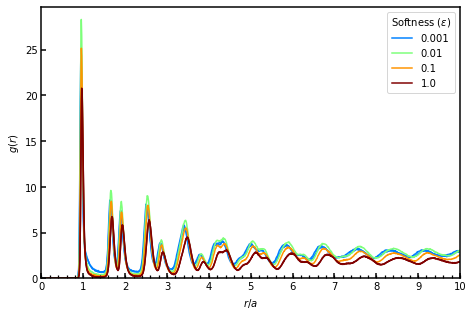

In [10]:
# Now let's look at this keeping various variables constant: activity 
fig, ax = plt.subplots(1, 1, figsize=(7.5, 5))

for i in range(0, len(all_rdf)):
    if params['pe'][i] == 200. and params['phi'][i] == 55 and params['eps'][i] > 0.0001:
        mmax = max(all_rdf[i]['g(r)'])
        ax.plot(all_rdf[i]['r'] / params['lat'][i], all_rdf[i]['g(r)'],
                c=plt.cm.jet((np.log10(params['eps'][i])+4.)/4.), lw=1.5,
                label=params['eps'][i], zorder=params['eps'][i])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title=r'Softness $(\epsilon)$')
 
ax.set_xlim(0, 10.)
ax.set_ylim(0,)
# Set the x and y minor ticks
loc = ticker.MultipleLocator(base=1.)
ax.xaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=0.2)
ax.xaxis.set_minor_locator(loc)
# Tick width and height
ax.xaxis.set_tick_params(width=1.5, size=5.)
ax.yaxis.set_tick_params(width=1.5, size=5.)
ax.xaxis.set_tick_params(which='minor', width=1.25, size=3.)
ax.yaxis.set_tick_params(which='minor', width=1.25, size=3.)
ax.set_ylabel(r'$g(r)$')
ax.set_xlabel(r'$r/a$')
plt.show()

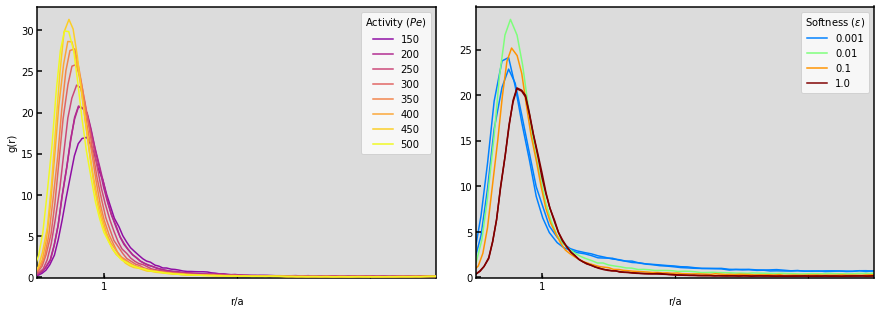

In [11]:
# Let's plot all of these things together
fig = plt.figure(figsize=(15, 5))
gs = plt.GridSpec(1, 2, wspace=0.1, hspace=0.2)
ax = []
ax.append(plt.subplot(gs[0, 0]))
ax.append(plt.subplot(gs[0, 1]))
# ax.append(plt.subplot(gs[1, :]))

# Plot upper left: varied Pe
for i in range(0, len(all_rdf)):
    if params['eps'][i] == 1. and params['pe'][i] > 100 and params['phi'][i] == 55:
        mmax = max(all_rdf[i]['g(r)'])
        ax[0].plot(all_rdf[i]['r'] / params['lat'][i], all_rdf[i]['g(r)'],
                c=plt.cm.plasma(params['pe'][i]/500.), lw=1.5,
                label=int(params['pe'][i]), zorder=params['pe'][i])

handles, labels = ax[0].get_legend_handles_labels()
for i in range(0, len(labels)):
    for j in range(0, len(labels)):
        if labels[j] < labels[i] and j > i:
            labels[i], labels[j] = labels[j], labels[i]
            handles[i], handles[j] = handles[j], handles[i]
by_label = OrderedDict(zip(labels, handles))
ax[0].legend(by_label.values(), by_label.keys(), title=r'Activity $(Pe)$')

# Plot upper right: varied ep
for i in range(0, len(all_rdf)):
    if params['pe'][i] == 200. and params['phi'][i] == 55 and params['eps'][i] > 0.0001:
        mmax = max(all_rdf[i]['g(r)'])
        ax[1].plot(all_rdf[i]['r'] / params['lat'][i], all_rdf[i]['g(r)'],
                c=plt.cm.jet((np.log10(params['eps'][i])+4.)/4.), lw=1.5,
                label=params['eps'][i], zorder=params['eps'][i])

handles, labels = ax[1].get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax[1].legend(by_label.values(), by_label.keys(), title=r'Softness $(\epsilon)$')



ax[0].set_ylabel(r'g(r)')
# ax[2].set_ylabel(r'g(r)')
for i in range(0, len(ax)):
    ax[i].set_ylim(-0.1,)
    ax[i].set_xlabel(r'r/a')
    ax[i].set_xlim(0.9, 1.5)
    # Set the x and y minor ticks
    loc = ticker.MultipleLocator(base=1.)
    ax[i].xaxis.set_major_locator(loc)
    loc = ticker.MultipleLocator(base=0.2)
    ax[i].xaxis.set_minor_locator(loc)
    # Tick width and height
    ax[i].xaxis.set_tick_params(width=1.5, size=5.)
    ax[i].yaxis.set_tick_params(width=1.5, size=5.)
    ax[i].xaxis.set_tick_params(which='minor', width=1.25, size=3.)
    ax[i].yaxis.set_tick_params(which='minor', width=1.25, size=3.)
    ax[i].set_facecolor('#DCDCDC')

plt.savefig('rdf_comparison.pdf', dpi=200)
plt.show()
plt.close()